# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_XMM-13hr_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J133433.078+372554.315,203.63782337266287,37.431754223051236,6.9847007,13.434376,2.1696403,2.906115,6.4933176,0.87763226,1.452857,3.2806106,0.4192901,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.9995144,0.99898225,0.9983039,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133433.633+372512.415,203.6401381339806,37.420115254654874,1.0310532,2.1961179,0.33142015,1.5897974,3.0489619,0.4858424,1.1925479,2.2283738,0.41456002,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.99924165,0.99934655,1.0020564,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133434.248+372610.974,203.642701664299,37.43638171890455,20.386715,27.35786,13.499664,11.617934,18.406544,5.211206,0.61132336,1.3250972,0.15880571,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.99891216,0.99997336,0.9986768,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133435.005+372401.066,203.64585231812094,37.40029606712303,0.49773127,1.0078288,0.16110936,0.4081364,0.91871905,0.11969086,0.43382904,0.9071375,0.11940695,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.9985016,1.0002998,0.9986025,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133435.211+372437.343,203.64671169284446,37.41037300194208,0.4955061,1.0052835,0.16107698,2.417468,4.296743,0.93400943,0.49694812,1.0110023,0.14738633,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.99946797,1.0003507,0.9994392,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133436.521+372416.926,203.65217065179502,37.4047017765474,0.35082442,0.7378902,0.10269886,0.5333207,1.141729,0.14803047,0.2772477,0.66256535,0.07517053,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.9992712,1.0007743,0.99842787,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133437.126+372404.015,203.6546902591151,37.40111525600034,0.30246595,0.691223,0.08469282,0.44567937,1.0231638,0.12600817,0.25949535,0.597949,0.07005704,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.9988718,0.9983657,0.99828875,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J133438.257+372354.877,203.6594059919928,37.39857700502979,0.3017703,0.6744663,0.08417095,0.6688956,1.4911623,0.18732081,0.3153893,0.704401,0.087008625,-0.1909405,-0.30357784,-0.5548788,0.03317394,0.049712714,0.06745114,0.99915403,0.9999609,0.99993277,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


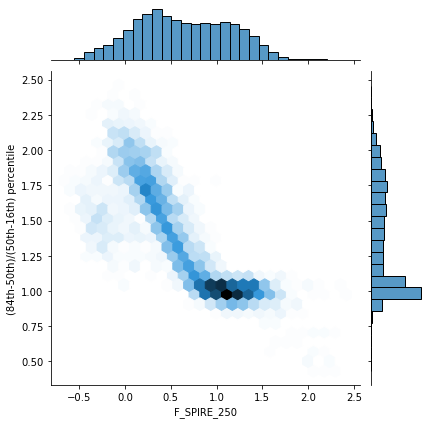

In [6]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_XMM-13hr.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_XMM-13hr.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


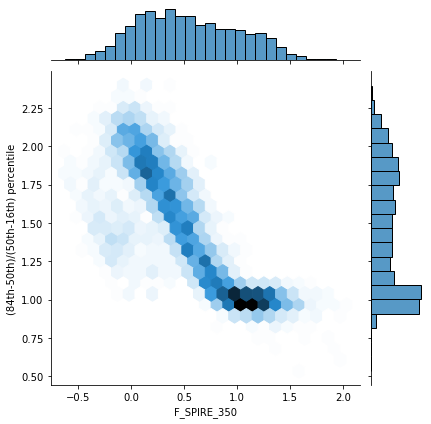

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_XMM-13hr.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_XMM-13hr.png', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


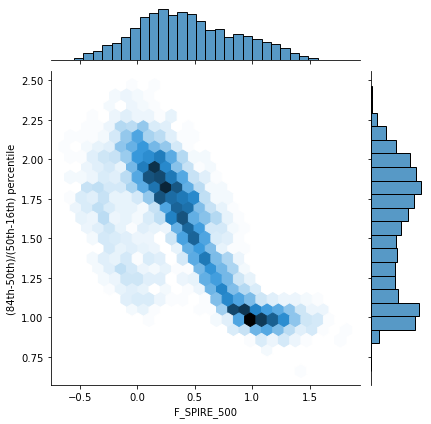

In [4]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_XMM-13hr.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_XMM-13hr.png', bbox='tight')

In [7]:
10**0.6

3.9810717055349722

## Add flag to catalogue

In [8]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [9]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 4)


In [10]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

1954 2349 2472 3563


In [11]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [12]:
cat.write('./data/dmu26_XID+SPIRE_XMM-13hr_cat_20191025.fits', format='fits',overwrite=True)


### Check Map

In [14]:
from astropy.io import fits
import pylab as plt

In [15]:
Pval=fits.open('./data/dmu26_XID+SPIRE_plw_XMM-13hr_Bayes_Pval.fits')


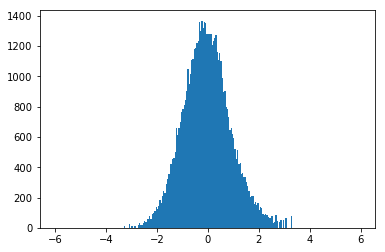

In [16]:
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

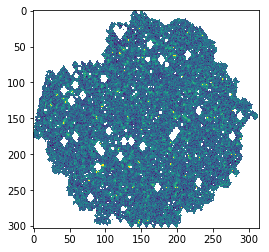

In [17]:
plt.imshow(Pval[1].data)